In [ ]:
from google.colab import drive
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
from sklearn.preprocessing import normalize
import gc
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, GlobalMaxPooling2D 
from keras.models import Model


In [ ]:
root_path = 'drive/My Drive/'

## **Loading and Preprocessing Images and saving to a numpy file**

In [ ]:
#load training data for a single angle of the exams (coronal, axial, sagittal) by giving its name.
def load_training(file_name):
    training_set = []
    for np_name in sorted(glob.glob('/content/drive/MyDrive/Disso/datasets/original_Dataset/train/'+file_name+'/*.npy')):
        training_set.append(np.load(np_name))
    return training_set    

In [ ]:
#load in the labels of 1 knee tear(abnormal, meniscus, acl) by the giving the file path that contains its labels
def load_labels(train_file_name):
    training_labels = np.loadtxt(train_file_name, delimiter=',')[:,1]
    return training_labels

In [ ]:
#each exam (stack) contains any number of slices 
#extract the 3 middle slices as most of the time they deside if the patiant has a certain tear or not
def extract(data, size):
    for i in range(len(data)):
        data[i] = list(data[i])
        middel_index = int(len(data[i]) / 2)
        data[i] = data[i][middel_index - 1 : middel_index + 2]
        data[i] = np.array(data[i])
    data = np.array(data)
    data = data.reshape(size, 256, 256 ,3)
    return data

In [ ]:
'''
def upd_extract_3(dataset, data_size):
  count = 0
  for i in range(len(dataset)):
    middle_idx = int(dataset[i].shape[0] / 2)
    print('mid: ',middle_idx)
    dataset[i] = dataset[i][middle_idx - 2 : middle_idx + 2]
    upper_half = np.hstack(dataset[i][:2])
    lower_half = np.hstack(dataset[i][2:])
    stacked_img = np.vstack((upper_half,lower_half))
    dataset[i] = np.stack((stacked_img,)*3,axis=-1)
    count=count+1

  dataset = np.array(dataset)
  print(count)
  return dataset
  '''

In [ ]:
#load the training data for each angle of the knee
training_set_axial= load_training('axial')
training_set_coronal=load_training('coronal')
training_set_sagittal=load_training('sagittal')

In [ ]:
# visulaise a single training example for a view
training_set_axial[0]

array([[[ 0,  0,  0, ...,  5,  4,  3],
        [ 0,  0,  0, ...,  8,  6,  8],
        [ 0,  0,  0, ..., 14, 11, 11],
        ...,
        [ 0,  0,  0, ..., 16, 15, 12],
        [ 0,  0,  0, ..., 12, 13, 12],
        [ 0,  0,  0, ..., 11,  7,  9]],

       [[ 0,  0,  0, ...,  3,  2,  2],
        [ 0,  0,  0, ...,  9,  7,  7],
        [ 0,  0,  0, ..., 13, 10, 10],
        ...,
        [ 0,  0,  0, ..., 12, 15, 13],
        [ 0,  0,  0, ..., 14, 12, 12],
        [ 0,  0,  0, ...,  6,  5,  7]],

       [[ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  8,  6,  6],
        [ 0,  0,  0, ..., 11, 13, 10],
        ...,
        [ 0,  0,  0, ..., 13, 13, 16],
        [ 0,  0,  0, ..., 10, 10, 12],
        [ 0,  0,  0, ...,  6,  6,  5]],

       ...,

       [[ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  5,  4,  4],
        [ 0,  0,  0, ...,  8,  9, 11],
        ...,
        [ 0,  0,  0, ..., 14, 16, 13],
        [ 0,  0,  0, ..., 12, 12,  8],
        [ 0,  0,  0, ...,  5,  4

In [ ]:
#extracts the slices and saves it as a variable
training_set_axial= extract(training_set_axial,1130)
training_set_coronal=extract(training_set_coronal,1130)
training_set_sagittal=extract(training_set_sagittal,1130)

mid:  22
mid:  15
mid:  19
mid:  16
mid:  20
mid:  20
mid:  14
mid:  16
mid:  19
mid:  17
mid:  19
mid:  22
mid:  23
mid:  19
mid:  12
mid:  16
mid:  24
mid:  12
mid:  15
mid:  19
mid:  18
mid:  16
mid:  18
mid:  18
mid:  19
mid:  12
mid:  19
mid:  11
mid:  16
mid:  22
mid:  20
mid:  25
mid:  18
mid:  22
mid:  19
mid:  20
mid:  13
mid:  13
mid:  19
mid:  18
mid:  14
mid:  20
mid:  19
mid:  22
mid:  12
mid:  23
mid:  16
mid:  12
mid:  17
mid:  20
mid:  19
mid:  21
mid:  21
mid:  9
mid:  18
mid:  20
mid:  17
mid:  20
mid:  14
mid:  21
mid:  19
mid:  19
mid:  16
mid:  20
mid:  14
mid:  24
mid:  11
mid:  23
mid:  13
mid:  20
mid:  15
mid:  16
mid:  15
mid:  14
mid:  18
mid:  17
mid:  13
mid:  13
mid:  25
mid:  18
mid:  18
mid:  14
mid:  16
mid:  15
mid:  18
mid:  21
mid:  22
mid:  17
mid:  20
mid:  12
mid:  20
mid:  15
mid:  18
mid:  24
mid:  24
mid:  19
mid:  16
mid:  19
mid:  21
mid:  12
mid:  11
mid:  14
mid:  14
mid:  24
mid:  17
mid:  11
mid:  14
mid:  21
mid:  17
mid:  22
mid:  16
mi

In [ ]:
training_set_axial.shape

(1130, 512, 512, 3)

In [ ]:
a = training_set_axial[1]

<function matplotlib.pyplot.show(*args, **kw)>

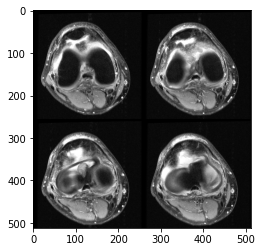

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(a)
plt.show

In [ ]:
# save numpy arrays of all views in a npy file
from numpy import save
save('axial.npy', training_set_axial)
save('coronal.npy', training_set_coronal)
save('sagittal.npy', training_set_sagittal)